<a href="https://colab.research.google.com/github/Younes-Piro/Disaster_tweeter_classification/blob/main/NLP_Tweet_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 kB 37.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Foun

In [2]:
import pandas as pd


In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
#All columns uppercase
df_train.columns = [col.upper() for col in df_train.columns]

In [7]:
df_train.drop(['KEYWORD', 'LOCATION'], axis=1, inplace=True)

In [8]:
df_train.TARGET.value_counts()

0    4342
1    3271
Name: TARGET, dtype: int64

# **DATA CLEANING**

In [9]:
import string
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
en_stopword = nltk.corpus.stopwords.words('english')


In [11]:
string.punctuation
ps = nltk.PorterStemmer()


In [12]:
transformer_regex = df_train.replace(regex={
    ' AFAIK ':'As Far As I Know',
    ' AFK ':' Away From Keyboard ',
    ' ASAP ':' As Soon As Possible ',
    ' ATK ':' At The Keyboard ',
    ' ATM ':' At The Moment ',
    ' A3 ':' Anytime, Anywhere, Anyplace ',
    ' BAK ':' Back At Keyboard ',
    ' BBL ':' Be Back Later ',
    ' BBS ':' Be Back Soon ',
    ' BFN ':' Bye For Now ',
    ' B4N ':' Bye For Now ',
    ' BRB ':' Be Right Back ',
    ' BRT ':' Be Right There ',
    ' BTW ':' By The Way ',
    ' B4 ':' Before ',
    ' B4N ':' Bye For Now ',
    ' CU ':' See You ',
    ' CUL8R ':' See You Later ',
    ' CYA ':' See You ',
    ' FAQ ':' Frequently Asked Questions ',
    ' FC ':' Fingers Crossed ',
    ' FWIW ':" For What It's Worth ",
    ' FYI ':' For Your Information ',
    ' GAL ':' Get A Life ',
    ' GG ':' Good Game ',
    ' GN ':' Good Night ',
    ' GMTA ':' Great Minds Think Alike ',
    ' GR8 ':" Great! ",
    ' G9 ':" Genius ",
    ' IC ':" I See ",
    ' ICQ ':" I Seek you ",
    ' ILU ':" I Love You ",
    ' IMHO ':" In My Honest ",
    ' IMO ':" In My Opinion ",
    ' IOW ':" In Other Words ",
    ' IRL ':" In Real Life ",
    ' KISS ':" Keep It Simple, Stupid ",
    ' LDR ':" Long Distance Relationship ",
    ' LMAO ':" Laugh My Ass ",
    ' LOL ':" Laughing Out Loud ",
    ' LTNS ':" Long Time No See ",
    ' L8R ':" Later ",
    ' MTE ':" My Thoughts Exactly ",
    ' M8 ':" Mate ",
    ' NRN ':" No Reply Necessary ",
    ' OIC ':" Oh I See ",
    ' PITA ':" Pain In The Ass ",
    ' PRT ':" Party ",
    ' PRW ':" Parents Are Watching ",
    ' ROFL ':" Rolling On The Floor Laughing ",
    ' ROFLOL ':" Rolling On The Floor Laughing Out Loud ",
    ' ROTFLMAO ':" Rolling On The Floor Laughing My Ass ",
    ' SK8 ':" Skate ",
    ' STATS ':" Your sex and age ",
    ' ASL ':" Age, Sex, Location ",
    ' THX ':" Thank You ",
    ' TTFN ':" Ta-Ta For Now! ",
    ' TTYL ':" Talk To You Later ",
    ' U ':" You ",
    ' U2 ':" You Too",
    ' U4E ':" Yours For Ever ",
    ' WB ':" Welcome Back ",
    ' WTF ':" What The Fuck ",
    ' WTG ':" Way To Go! ",
    ' WUF ':" Where Are You From? ",
    ' W8 ':" Wait",},inplace=True)


In [13]:
#remove stopwords
def remove_stopwords(text) : 
    return " ".join([word for word in text.split() if word not in (en_stopword)])

In [14]:
def remove_html(text) :
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [15]:
def remove_mentions(text):
    mention = "@[A-Za-z0-9_]+"
    return re.sub(mention,"", text)

In [16]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [17]:
def clean_text(text) :
    text = str(text).lower()
    text = remove_mentions(text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = remove_html(text)
    text = remove_emojis(text)
    text = remove_stopwords(text)
    return text

In [18]:
df_train['CLEANED_TEXT'] = df_train['TEXT'].apply( lambda x:clean_text(x))

In [19]:
df_train

,ID,TEXT,TARGET,CLEANED_TEXT
0,1,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding bridge collapse nearb...
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1,control wild fires california even northern pa...
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano hawaii
7611,10872,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...


In [20]:
# Tokenizing our cleaned text : 
df_train['clean_text_tokenized'.upper()] = df_train['CLEANED_TEXT'].apply(word_tokenize)

In [21]:
df_train

,ID,TEXT,TARGET,CLEANED_TEXT,CLEAN_TEXT_TOKENIZED
0,1,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o..."
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding bridge collapse nearb...,"[two, giant, cranes, holding, bridge, collapse..."
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1,control wild fires california even northern pa...,"[control, wild, fires, california, even, north..."
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano hawaii,"[volcano, hawaii]"
7611,10872,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ..."


In [22]:
lemma = WordNetLemmatizer()

In [23]:
for row in df_train['clean_text_tokenized'.upper()]:
  for index, word in enumerate(row):
    row[index] = lemma.lemmatize(word)

In [24]:
corpus = []
for sentences in list(df_train['clean_text_tokenized'.upper()]) :
    corpus.append(' '.join(sentences))
len(corpus)

7613

In [25]:
df_train['final_text'.upper()] = corpus

In [26]:
df_train

,ID,TEXT,TARGET,CLEANED_TEXT,CLEAN_TEXT_TOKENIZED,FINAL_TEXT
0,1,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us,"[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,"[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,"[people, receive, wildfire, evacuation, order,...",people receive wildfire evacuation order calif...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding bridge collapse nearb...,"[two, giant, crane, holding, bridge, collapse,...",two giant crane holding bridge collapse nearby...
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1,control wild fires california even northern pa...,"[control, wild, fire, california, even, northe...",control wild fire california even northern par...
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano hawaii,"[volcano, hawaii]",volcano hawaii
7611,10872,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ...",police investigating ebike collided car little...


In [27]:
df_train.drop(['ID', 'TEXT', 'CLEANED_TEXT', 'CLEAN_TEXT_TOKENIZED'], axis=1, inplace=True)

In [28]:
df_train.head()

,TARGET,FINAL_TEXT
0,1,deed reason earthquake may allah forgive u
1,1,forest fire near la ronge sask canada
2,1,resident asked shelter place notified officer ...
3,1,people receive wildfire evacuation order calif...
4,1,got sent photo ruby alaska smoke wildfire pour...


# Modelisation

 ***build embedding layer***

In [226]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [122]:
#one hot encoding

In [123]:
VOC_SIZE = 20000

one_hot_represent = [one_hot(words,VOC_SIZE)for words in df_train['final_text'.upper()]]

len(one_hot_represent)

7613

In [124]:
sent_length = 128
embedded_docs = pad_sequences(one_hot_represent,padding='pre',maxlen=sent_length)

print(embedded_docs)

[[    0     0     0 ... 18060  1632  6993]
 [    0     0     0 ...  1042 14065  6399]
 [    0     0     0 ... 12699  3255   741]
 ...
 [    0     0     0 ...     0  5772  7681]
 [    0     0     0 ...  1353  3321 14787]
 [    0     0     0 ... 11940 11709 18218]]


***split train and test***

In [ ]:
y = df_train['target'.upper()]

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.18, random_state=42)

In [ ]:
y_train.shape

(6242,)

# MODELISATION

   1 - ***LSTM***



In [223]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [224]:
embedding_vector_features = 50
lstm_units = 64 # number of units in the LSTM layer

In [225]:
# create sequential model
my_model = Sequential()

my_model.add(Embedding(20000,embedding_vector_features,input_length=sent_length))
my_model.add(Dropout(0.2))
my_model.add(LSTM(lstm_units))
my_model.add(Dropout(0.2))
my_model.add(Dense(1,activation='sigmoid'))
my_model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
my_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 128, 50)           1000000   
                                                                 
 dropout_162 (Dropout)       (None, 128, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                29440     
                                                                 
 dropout_163 (Dropout)       (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,029,505
Trainable params: 1,029,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = my_model.fit(
    X_train,
    y_train,
    validation_data=(X_test,y_test),
    epochs= 30,
    batch_size=512
)

***TEST data***

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.drop(columns=['id','keyword','location'],inplace=True)

In [ ]:
transformer_regex = df_test.replace(regex={
    ' AFAIK ':'As Far As I Know',
    ' AFK ':' Away From Keyboard ',
    ' ASAP ':' As Soon As Possible ',
    ' ATK ':' At The Keyboard ',
    ' ATM ':' At The Moment ',
    ' A3 ':' Anytime, Anywhere, Anyplace ',
    ' BAK ':' Back At Keyboard ',
    ' BBL ':' Be Back Later ',
    ' BBS ':' Be Back Soon ',
    ' BFN ':' Bye For Now ',
    ' B4N ':' Bye For Now ',
    ' BRB ':' Be Right Back ',
    ' BRT ':' Be Right There ',
    ' BTW ':' By The Way ',
    ' B4 ':' Before ',
    ' B4N ':' Bye For Now ',
    ' CU ':' See You ',
    ' CUL8R ':' See You Later ',
    ' CYA ':' See You ',
    ' FAQ ':' Frequently Asked Questions ',
    ' FC ':' Fingers Crossed ',
    ' FWIW ':" For What It's Worth ",
    ' FYI ':' For Your Information ',
    ' GAL ':' Get A Life ',
    ' GG ':' Good Game ',
    ' GN ':' Good Night ',
    ' GMTA ':' Great Minds Think Alike ',
    ' GR8 ':" Great! ",
    ' G9 ':" Genius ",
    ' IC ':" I See ",
    ' ICQ ':" I Seek you ",
    ' ILU ':" I Love You ",
    ' IMHO ':" In My Honest ",
    ' IMO ':" In My Opinion ",
    ' IOW ':" In Other Words ",
    ' IRL ':" In Real Life ",
    ' KISS ':" Keep It Simple, Stupid ",
    ' LDR ':" Long Distance Relationship ",
    ' LMAO ':" Laugh My Ass ",
    ' LOL ':" Laughing Out Loud ",
    ' LTNS ':" Long Time No See ",
    ' L8R ':" Later ",
    ' MTE ':" My Thoughts Exactly ",
    ' M8 ':" Mate ",
    ' NRN ':" No Reply Necessary ",
    ' OIC ':" Oh I See ",
    ' PITA ':" Pain In The Ass ",
    ' PRT ':" Party ",
    ' PRW ':" Parents Are Watching ",
    ' ROFL ':" Rolling On The Floor Laughing ",
    ' ROFLOL ':" Rolling On The Floor Laughing Out Loud ",
    ' ROTFLMAO ':" Rolling On The Floor Laughing My Ass ",
    ' SK8 ':" Skate ",
    ' STATS ':" Your sex and age ",
    ' ASL ':" Age, Sex, Location ",
    ' THX ':" Thank You ",
    ' TTFN ':" Ta-Ta For Now! ",
    ' TTYL ':" Talk To You Later ",
    ' U ':" You ",
    ' U2 ':" You Too",
    ' U4E ':" Yours For Ever ",
    ' WB ':" Welcome Back ",
    ' WTF ':" What The Fuck ",
    ' WTG ':" Way To Go! ",
    ' WUF ':" Where Are You From? ",
    ' W8 ':" Wait",},inplace=True)

In [ ]:
df_test['text'] = df_test['text'].apply( lambda x:clean_text(x))

In [ ]:
df_test['text'] = df_test['text'].apply(word_tokenize)

In [ ]:
test_corpus = []
for sentences in list(df_test['text']) :
    test_corpus.append(' '.join(sentences))
len(test_corpus)

In [ ]:
df_test['final_text'] = test_corpus

In [ ]:
one_hot_test_represent = [one_hot(words,VOC_SIZE)for words in df_test['final_text']]

embedded_test_docs = pad_sequences(one_hot_test_represent,padding='pre',maxlen=sent_length)

In [ ]:
y_pred = my_model.predict(embedded_test_docs)

In [ ]:
prediction_result = []

for one_pred in y_pred :
  if one_pred > 0.5 :
    prediction_result.append(1)
  else :
    prediction_result.append(0)

**Submission files**

In [ ]:
submission_file = pd.read_csv('sample_submission.csv')

In [ ]:
submission_file['target'] = prediction_result

In [ ]:
submission_file.to_csv('MySubmission.csv', index=False)

  2  -  ***BERT*** 

In [30]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.8 MB/s eta 0:00:00


In [156]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
import pandas as pd
import numpy as np

SEQ_LEN = 150

# initialize model and tokenizer
bert = TFAutoModel.from_pretrained("bert-base-cased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# define function to handle tokenization
def tokenize(sentence):
    tokens = tokenizer.encode_plus(sentence, max_length=SEQ_LEN,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_attention_mask=True,
                                   return_token_type_ids=False, return_tensors='tf')
    return tokens['input_ids'], tokens['attention_mask']

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [157]:
# initialize two arrays for input tensors
Xids = np.zeros((len(df_train), SEQ_LEN))
Xmask = np.zeros((len(df_train), SEQ_LEN))

In [158]:
Xids.shape

(7613, 150)

In [159]:
Xmask.shape

(7613, 150)

In [160]:
df_train

,TARGET,FINAL_TEXT
0,1,deed reason earthquake may allah forgive u
1,1,forest fire near la ronge sask canada
2,1,resident asked shelter place notified officer ...
3,1,people receive wildfire evacuation order calif...
4,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...
7608,1,two giant crane holding bridge collapse nearby...
7609,1,control wild fire california even northern par...
7610,1,volcano hawaii
7611,1,police investigating ebike collided car little...


In [161]:
arr = df_train['TARGET'].values  # take sentiment column in df as array
labels = np.zeros((arr.size, arr.max()+1))  # initialize empty (all zero) label array
labels[np.arange(arr.size), arr] = 1  # add ones in indices where we have a value

In [162]:
# loop through data and tokenize everything
for i, sentence in enumerate(df_train['FINAL_TEXT']):
    Xids[i, :], Xmask[i, :] = tokenize(sentence)

In [163]:
# create tensorflow dataset object
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [164]:
# restructure dataset format for BERT
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

In [165]:
dataset = dataset.map(map_func)  # apply the mapping function

In [166]:
# shuffle and batch the dataset
dataset = dataset.batch(32)

DS_LEN = len(list(dataset))  # get dataset length

SPLIT = 0.9  # we will create a 90-10 split

In [167]:
# create training-validation sets
train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))

In [168]:
# free up space
del dataset

In [169]:
# build the model
input_ids = tf.keras.layers.Input(shape=(150,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(150,), name='attention_mask', dtype='int32')

input_ids = tf.keras.layers.Input(shape=(150,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(150,), name='attention_mask', dtype='int32')

embeddings = bert(input_ids, attention_mask=mask)[0]  # we only keep tensor 0 (last_hidden_state)

X = tf.keras.layers.GlobalMaxPool1D()(embeddings)  # reduce tensor dimensionality
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
y = tf.keras.layers.Dense(2, activation='sigmoid', name='outputs')(X)  # adjust based on number of sentiment classes

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

In [170]:
# freeze the BERT layer
model.layers[2].trainable = False

In [171]:
# compile the model
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.BinaryCrossentropy()
acc = tf.keras.metrics.Accuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [172]:
# train model
history = model.fit(
    train, 
    validation_data=val
    ,epochs=5)

Epoch 1/5
214/214 [==============================] - 121s 424ms/step - loss: 0.7575 - accuracy: 0.6301 - val_loss: 0.6446 - val_accuracy: 0.7294
Epoch 2/5
214/214 [==============================] - 90s 420ms/step - loss: 0.6370 - accuracy: 0.6733 - val_loss: 0.5637 - val_accuracy: 0.7190
Epoch 3/5
214/214 [==============================] - 90s 422ms/step - loss: 0.6175 - accuracy: 0.6812 - val_loss: 0.5239 - val_accuracy: 0.7673
Epoch 4/5
214/214 [==============================] - 90s 419ms/step - loss: 0.6144 - accuracy: 0.6726 - val_loss: 0.5633 - val_accuracy: 0.7477
Epoch 5/5
214/214 [==============================] - 90s 420ms/step - loss: 0.6009 - accuracy: 0.6866 - val_loss: 0.5153 - val_accuracy: 0.7582


In [173]:
import matplotlib.pyplot as plt

# Visualizing Model accuracy / loss :

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


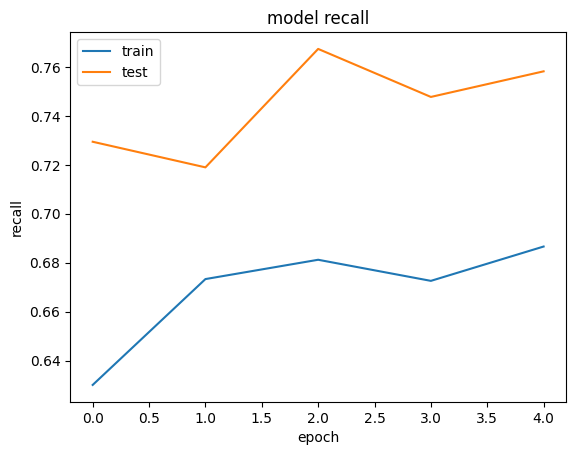

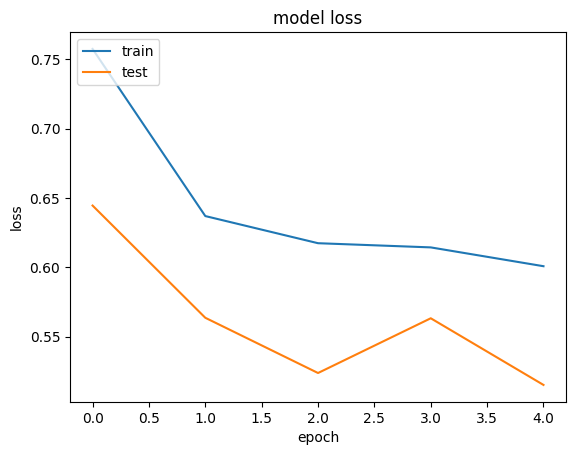

In [174]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# TEST DATASET

In [175]:
df_test = pd.read_csv('test.csv')

In [176]:
df_test.drop(columns=['id','keyword','location'],inplace=True)

In [177]:
df_test

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


In [178]:
transformer_regex = df_test.replace(regex={
    ' AFAIK ':'As Far As I Know',
    ' AFK ':' Away From Keyboard ',
    ' ASAP ':' As Soon As Possible ',
    ' ATK ':' At The Keyboard ',
    ' ATM ':' At The Moment ',
    ' A3 ':' Anytime, Anywhere, Anyplace ',
    ' BAK ':' Back At Keyboard ',
    ' BBL ':' Be Back Later ',
    ' BBS ':' Be Back Soon ',
    ' BFN ':' Bye For Now ',
    ' B4N ':' Bye For Now ',
    ' BRB ':' Be Right Back ',
    ' BRT ':' Be Right There ',
    ' BTW ':' By The Way ',
    ' B4 ':' Before ',
    ' B4N ':' Bye For Now ',
    ' CU ':' See You ',
    ' CUL8R ':' See You Later ',
    ' CYA ':' See You ',
    ' FAQ ':' Frequently Asked Questions ',
    ' FC ':' Fingers Crossed ',
    ' FWIW ':" For What It's Worth ",
    ' FYI ':' For Your Information ',
    ' GAL ':' Get A Life ',
    ' GG ':' Good Game ',
    ' GN ':' Good Night ',
    ' GMTA ':' Great Minds Think Alike ',
    ' GR8 ':" Great! ",
    ' G9 ':" Genius ",
    ' IC ':" I See ",
    ' ICQ ':" I Seek you ",
    ' ILU ':" I Love You ",
    ' IMHO ':" In My Honest ",
    ' IMO ':" In My Opinion ",
    ' IOW ':" In Other Words ",
    ' IRL ':" In Real Life ",
    ' KISS ':" Keep It Simple, Stupid ",
    ' LDR ':" Long Distance Relationship ",
    ' LMAO ':" Laugh My Ass ",
    ' LOL ':" Laughing Out Loud ",
    ' LTNS ':" Long Time No See ",
    ' L8R ':" Later ",
    ' MTE ':" My Thoughts Exactly ",
    ' M8 ':" Mate ",
    ' NRN ':" No Reply Necessary ",
    ' OIC ':" Oh I See ",
    ' PITA ':" Pain In The Ass ",
    ' PRT ':" Party ",
    ' PRW ':" Parents Are Watching ",
    ' ROFL ':" Rolling On The Floor Laughing ",
    ' ROFLOL ':" Rolling On The Floor Laughing Out Loud ",
    ' ROTFLMAO ':" Rolling On The Floor Laughing My Ass ",
    ' SK8 ':" Skate ",
    ' STATS ':" Your sex and age ",
    ' ASL ':" Age, Sex, Location ",
    ' THX ':" Thank You ",
    ' TTFN ':" Ta-Ta For Now! ",
    ' TTYL ':" Talk To You Later ",
    ' U ':" You ",
    ' U2 ':" You Too",
    ' U4E ':" Yours For Ever ",
    ' WB ':" Welcome Back ",
    ' WTF ':" What The Fuck ",
    ' WTG ':" Way To Go! ",
    ' WUF ':" Where Are You From? ",
    ' W8 ':" Wait",},inplace=True)

In [179]:
df_test['text'] = df_test['text'].apply( lambda x:clean_text(x))

In [180]:
df_test['text'] = df_test['text'].apply(word_tokenize)

In [181]:
for row in df_test['text']:
  for index, word in enumerate(row):
    row[index] = lemma.lemmatize(word)

In [182]:

test_corpus = []
for sentences in list(df_test['text']) :
    test_corpus.append(' '.join(sentences))
len(test_corpus)

3263

In [183]:
df_test['final_text'] = test_corpus

In [184]:
df_test

,text,final_text
0,"[happened, terrible, car, crash]",happened terrible car crash
1,"[heard, earthquake, different, city, stay, saf...",heard earthquake different city stay safe ever...
2,"[forest, fire, spot, pond, goose, fleeing, acr...",forest fire spot pond goose fleeing across str...
3,"[apocalypse, lighting, spokane, wildfire]",apocalypse lighting spokane wildfire
4,"[typhoon, soudelor, kill, china, taiwan]",typhoon soudelor kill china taiwan
...,...,...
3258,"[earthquake, safety, los, angeles, ûò, safety...",earthquake safety los angeles ûò safety faste...
3259,"[storm, ri, worse, last, hurricane, hardest, h...",storm ri worse last hurricane hardest hit yard...
3260,"[green, line, derailment, chicago]",green line derailment chicago
3261,"[meg, issue, hazardous, weather, outlook, hwo]",meg issue hazardous weather outlook hwo


In [185]:
labels = np.zeros((len(df_test), 2))  # initialize empty (all zero) label array

# initialize two arrays for input tensors
Xids = np.zeros((len(df_test), SEQ_LEN))
Xmask = np.zeros((len(df_test), SEQ_LEN))

# loop through data and tokenize everything
for i, sentence in enumerate(df_test['final_text']):
    Xids[i, :], Xmask[i, :] = tokenize(sentence)

# create tensorflow dataset object
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

# restructure dataset format for BERT
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels
  
dataset = dataset.map(map_func)  # apply the mapping function

# shuffle and batch the dataset
dataset = dataset.batch(32)

In [186]:
labels.shape

(3263, 2)

In [187]:
y_pred = model.predict(dataset)

In [188]:
y_pred[:, 0][:30]

array([8.2716770e-02, 8.8915730e-01, 3.9029226e-01, 5.8270699e-01,
       5.5269527e-01, 6.3473219e-04, 6.2702149e-01, 9.9729174e-01,
       9.7868186e-01, 9.7434688e-01, 9.3367422e-01, 7.1859312e-01,
       9.3148941e-01, 9.6568787e-01, 9.8559988e-01, 5.7949114e-01,
       5.9817094e-01, 5.9836370e-01, 7.2203946e-01, 7.3112607e-01,
       5.8708143e-01, 2.1666449e-01, 5.8017176e-01, 2.9646111e-01,
       5.7674909e-01, 5.6079072e-01, 7.2891349e-01, 2.6100850e-01,
       6.5738040e-01, 5.0104833e-01], dtype=float32)

In [189]:
len(y_pred)

3263

In [218]:
prediction_result = []

for one_pred in y_pred[:,1] :
  if one_pred > 0.5 :
    prediction_result.append(1)
  else :
    prediction_result.append(0)

In [219]:
prediction_result[:10]

[1, 0, 1, 0, 0, 1, 0, 0, 0, 0]

In [198]:
submission_file = pd.read_csv('sample_submission.csv')

In [199]:
submission_file

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [200]:
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

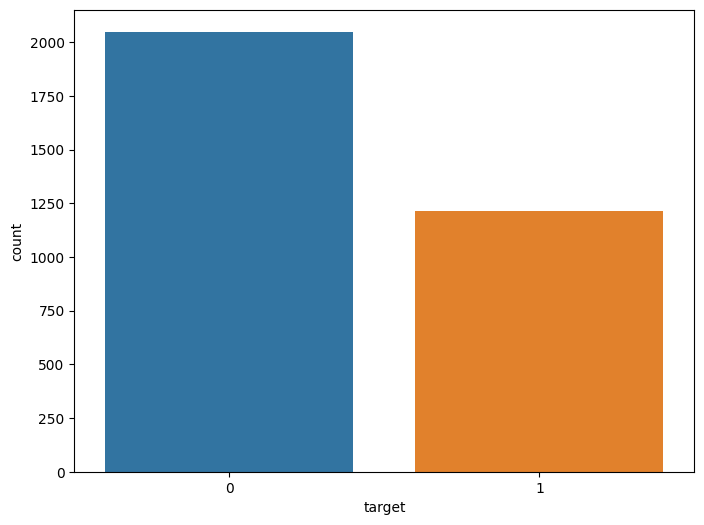

In [221]:
plt.figure(figsize=(8,6))
sns.countplot(x='target',data=submission_file)

In [220]:
submission_file['target'] = prediction_result

In [222]:
submission_file.to_csv('MySubmission.csv', index=False)